#  Testing Overlap Algorithms
This notebook will test our swap test and BBA implementation that computes the overlap Tr$(\rho\sigma)$

In [1]:
from sys import path
path.insert(0, '..')

from swap import *
from bba import *
from utilities import *
import numpy as np
import matplotlib.pyplot as plt

Consider two wavefunctions

$$\begin{align*}
|\psi> &= \frac{1}{\sqrt{2}}\left( |0> +             |1>\right) \\
|\phi> &= \frac{1}{\sqrt{2}}\left( |0> + e^{i\alpha} |1>\right)
\end{align*}
$$

To perform the overlap via the swap test, we'll first have to construct the quantum circuits representing these wavefunctions:

In [2]:
alpha = np.pi/4

#quantum circuit
psi = psi_qc(0)
phi = psi_qc(alpha)

#classical representation
psi_c = psi_classical(0)
phi_c = psi_classical(alpha)

The circuit for $|\phi>$ is drawn below:

In [3]:
phi.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RZ(pi/4) ├
     └───┘└──────────┘

Now, let's look at the swap test quantum circuit with these wavefuntions:

In [4]:
#constructing the swap circuit
qc_swap = swap_test_QC(psi, phi)
qc_swap.draw()

┌───┐               ┌───┐┌─┐
  a_0: ┤ H ├─────────────■─┤ H ├┤M├
       ├───┤             │ └───┘└╥┘
psi_0: ┤ H ├─────────────X───────╫─
       ├───┤┌──────────┐ │       ║ 
phi_0: ┤ H ├┤ RZ(pi/4) ├─X───────╫─
       └───┘└──────────┘         ║ 
  m_0: ══════════════════════════╩═

and below is the BBA quantum circuit with these same wavefunctions:

In [5]:
#constructing the bba circuit
qc_swap = bba_QC(psi, phi)
qc_swap.draw()

┌───┐                 ┌───┐┌─┐
psi_0: ┤ H ├──────────────■──┤ H ├┤M├
       ├───┤┌──────────┐┌─┴─┐└┬─┬┘└╥┘
phi_0: ┤ H ├┤ RZ(pi/4) ├┤ X ├─┤M├──╫─
       └───┘└──────────┘└───┘ └╥┘  ║ 
  m_0: ════════════════════════╬═══╩═
                               ║     
  m_1: ════════════════════════╩═════

Now we run the simulation and obtain the overlap. Then we compare to the exact results:

In [6]:
overlap_sw = swap_overlap(psi, phi, shots=10000)
overlap_bb =  bba_overlap(psi, phi, shots=10000)
overlap_cl = classical_overlap(psi_c, phi_c)

In [7]:
print("swap test overlap: {}".format(overlap_sw))
print("      bba overlap: {}".format(overlap_bb))
print("    exact overlap: {}".format(overlap_cl))
print("")
print("  swap test error: {}".format(np.abs(overlap_sw-overlap_cl)))
print("        bba error: {}".format(np.abs(overlap_bb-overlap_cl)))

swap test overlap: 0.859
      bba overlap: 0.8558000000000001
    exact overlap: 0.8535533905932735

  swap test error: 0.005446609406726477
        bba error: 0.0022466094067266074


Now let's look at how these overlaps compare as we tune $\alpha$

In [8]:
N = 20
alpha_list = np.linspace(0, 2*np.pi, N)
o_sw_list = np.zeros(N)
o_bb_list = np.zeros(N)
o_cl_list = np.zeros(N)
swap_err_list = np.zeros(N)
bba_err_list = np.zeros(N)


psi = psi_qc(0)
psi_c = psi_classical(0)

for i, alpha in enumerate(alpha_list):
    print(i)
    phi = psi_qc(alpha)
    phi_c = psi_classical(alpha)
    o_sw_list[i] = swap_overlap(psi, phi, shots=1000, noise=True)
    o_bb_list[i] =  bba_overlap(psi, phi, shots=1000, noise=True)
    o_cl_list[i] = classical_overlap(psi_c, phi_c)
    swap_err_list[i] = np.abs(o_sw_list[i] - o_cl_list[i])   
    bba_err_list[i] = np.abs(o_bb_list[i] - o_cl_list[i])   


0


ibmqfactory.load_account:WARNING:2020-06-28 19:32:01,301: Credentials are already in use. The existing account in the session will be replaced.


1


ibmqfactory.load_account:WARNING:2020-06-28 19:32:05,291: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:08,981: Credentials are already in use. The existing account in the session will be replaced.


2


ibmqfactory.load_account:WARNING:2020-06-28 19:32:13,077: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:16,765: Credentials are already in use. The existing account in the session will be replaced.


3


ibmqfactory.load_account:WARNING:2020-06-28 19:32:20,450: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:24,854: Credentials are already in use. The existing account in the session will be replaced.


4


ibmqfactory.load_account:WARNING:2020-06-28 19:32:28,551: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:32,836: Credentials are already in use. The existing account in the session will be replaced.


5


ibmqfactory.load_account:WARNING:2020-06-28 19:32:36,424: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:39,771: Credentials are already in use. The existing account in the session will be replaced.


6


ibmqfactory.load_account:WARNING:2020-06-28 19:32:43,691: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:47,586: Credentials are already in use. The existing account in the session will be replaced.


7


ibmqfactory.load_account:WARNING:2020-06-28 19:32:51,783: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:32:55,367: Credentials are already in use. The existing account in the session will be replaced.


8


ibmqfactory.load_account:WARNING:2020-06-28 19:32:59,051: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:02,537: Credentials are already in use. The existing account in the session will be replaced.


9


ibmqfactory.load_account:WARNING:2020-06-28 19:33:06,428: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:10,114: Credentials are already in use. The existing account in the session will be replaced.


10


ibmqfactory.load_account:WARNING:2020-06-28 19:33:13,544: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:17,384: Credentials are already in use. The existing account in the session will be replaced.


11


ibmqfactory.load_account:WARNING:2020-06-28 19:33:20,969: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:24,964: Credentials are already in use. The existing account in the session will be replaced.


12


ibmqfactory.load_account:WARNING:2020-06-28 19:33:28,850: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:32,843: Credentials are already in use. The existing account in the session will be replaced.


13


ibmqfactory.load_account:WARNING:2020-06-28 19:33:36,685: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:40,323: Credentials are already in use. The existing account in the session will be replaced.


14


ibmqfactory.load_account:WARNING:2020-06-28 19:33:43,804: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:47,798: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:33:51,202: Credentials are already in use. The existing account in the session will be replaced.


15


ibmqfactory.load_account:WARNING:2020-06-28 19:33:55,167: Credentials are already in use. The existing account in the session will be replaced.


16


ibmqfactory.load_account:WARNING:2020-06-28 19:33:59,267: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:34:02,642: Credentials are already in use. The existing account in the session will be replaced.


17


ibmqfactory.load_account:WARNING:2020-06-28 19:34:06,414: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:34:09,917: Credentials are already in use. The existing account in the session will be replaced.


18


ibmqfactory.load_account:WARNING:2020-06-28 19:34:13,500: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:34:17,495: Credentials are already in use. The existing account in the session will be replaced.


19


ibmqfactory.load_account:WARNING:2020-06-28 19:34:21,182: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2020-06-28 19:34:25,274: Credentials are already in use. The existing account in the session will be replaced.


<IPython.core.display.Javascript object>


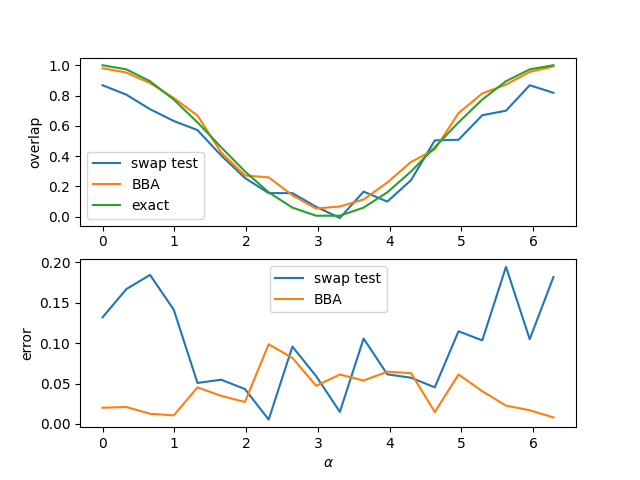

In [9]:
%matplotlib notebook

plt.subplot(211)
plt.plot(alpha_list, o_sw_list, label="swap test")
plt.plot(alpha_list, o_bb_list, label="BBA")
plt.plot(alpha_list, o_cl_list, label="exact")

plt.legend(loc='best')
plt.ylabel("overlap")
plt.subplot(212)
plt.plot(alpha_list, swap_err_list, label="swap test")
plt.plot(alpha_list, bba_err_list, label="BBA")
plt.xlabel(r"$\alpha$")
plt.ylabel("error")
plt.legend(loc='best')
plt.show()